In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

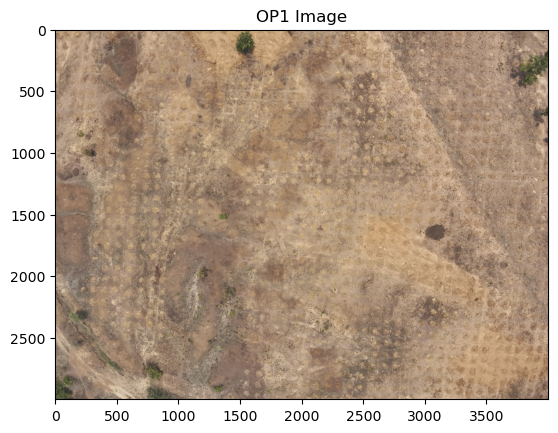

In [4]:
img_op1 = cv2.imread(r"E:\VS CODe\final dataset\Post-Pitting\DJI_20240608115620_0012_V.JPG")
img_op3 = cv2.imread(r"E:\VS CODe\final dataset\post-SW\DJI_20241229132951_0001_V.JPG")

img_op1 = cv2.cvtColor(img_op1, cv2.COLOR_BGR2RGB)
img_op3 = cv2.cvtColor(img_op3, cv2.COLOR_BGR2RGB)

plt.imshow(img_op1); plt.title("OP1 Image")
plt.show()

In [5]:
gray = cv2.cvtColor(img_op1, cv2.COLOR_RGB2GRAY)
blur = cv2.GaussianBlur(gray, (7,7), 0)

_, thresh = cv2.threshold(
    blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU
)

kernel = np.ones((3,3), np.uint8)
clean = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)



In [6]:
contours, _ = cv2.findContours(
    clean, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
)

pit_centers = []

for cnt in contours:
    area = cv2.contourArea(cnt)

    # tuned for pit size at 70–80m altitude
    if 150 < area < 2000:
        M = cv2.moments(cnt)
        if M["m00"] != 0:
            cx = int(M["m10"] / M["m00"])
            cy = int(M["m01"] / M["m00"])
            pit_centers.append((cx, cy))

In [7]:
op3_gray = cv2.cvtColor(img_op3, cv2.COLOR_RGB2GRAY)


In [8]:
def green_index(patch):
    R = patch[:,:,0].astype(float)
    G = patch[:,:,1].astype(float)
    B = patch[:,:,2].astype(float)
    return np.mean(G / (R + G + B + 1e-6))


In [9]:
def soil_variance(patch):
    gray = cv2.cvtColor(patch, cv2.COLOR_RGB2GRAY)
    return np.var(gray)

In [10]:
alive = 0
dead_points = []

for (x, y) in pit_centers:

    # boundary safety
    if y-15 < 0 or y+15 >= img_op3.shape[0] or x-15 < 0 or x+15 >= img_op3.shape[1]:
        continue

    patch = img_op3[y-15:y+15, x-15:x+15]

    gi = green_index(patch)
    var = soil_variance(patch)

    # survival logic:
    # vegetation OR cleared soil ring
    if gi > 0.35 or var > 200:
        alive += 1
    else:
        dead_points.append((x, y))

total = len(pit_centers)
dead = total - alive
survival_percent = (alive / total * 100) if total > 0 else 0

In [11]:
print("Total Saplings:", total)
print("Alive:", alive)
print("Dead:", dead)
print("Survival %:", round(survival_percent, 2))
print("Dead Pit Centers:", dead_points)
print("Dead Count:", len(dead_points))


Total Saplings: 818
Alive: 702
Dead: 116
Survival %: 85.82
Dead Pit Centers: [(3560, 2980), (3341, 2953), (1751, 2923), (3534, 2928), (3627, 2885), (3625, 2865), (3657, 2846), (3888, 2821), (3717, 2781), (3400, 2601), (3853, 2597), (2410, 2565), (2096, 2499), (3615, 2433), (3548, 2437), (3587, 2438), (3618, 2409), (2130, 2374), (1734, 2344), (1708, 2356), (1745, 2262), (3367, 2213), (3419, 2193), (3354, 2159), (3804, 2144), (2070, 2109), (2131, 1957), (3917, 1893), (3774, 1861), (3786, 1841), (3829, 1782), (3822, 1753), (3584, 1597), (3614, 1553), (3656, 1489), (1871, 1479), (3622, 1458), (3190, 1358), (3235, 1308), (3205, 1288), (1837, 1039), (1815, 1034), (2806, 996), (3675, 913), (1727, 889), (3642, 859), (1173, 857), (889, 834), (3759, 834), (3305, 808), (1584, 749), (3680, 729), (3636, 729), (783, 711), (3676, 676), (3627, 678), (3455, 625), (1679, 627), (668, 595), (3453, 596), (1415, 599), (712, 585), (3837, 572), (1435, 547), (3426, 535), (3829, 547), (1518, 376), (1494, 345), 

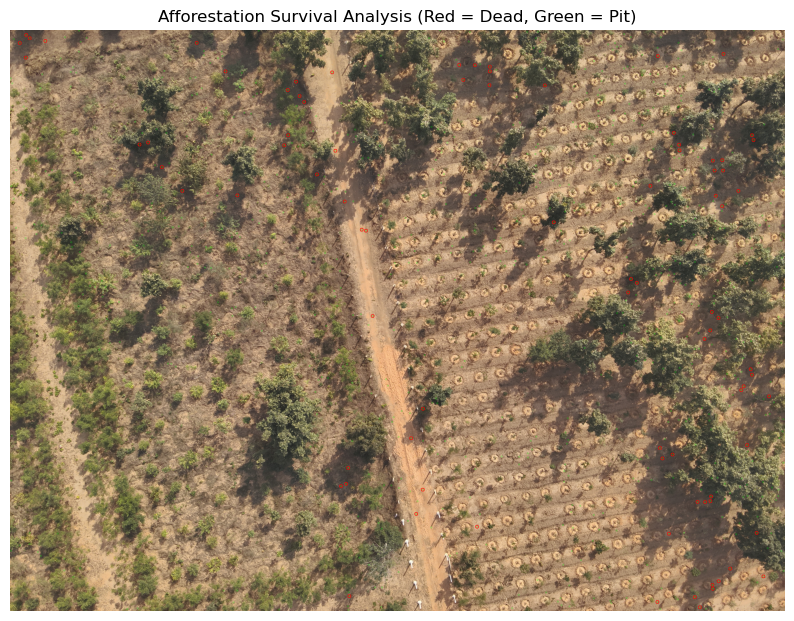

In [12]:
vis = img_op3.copy()

for (x, y) in pit_centers:
    cv2.circle(vis, (x, y), 4, (0,255,0), 1)   # green = detected pit

for (x, y) in dead_points:
    cv2.circle(vis, (x, y), 8, (255,0,0), 2)   # red = dead sapling

plt.figure(figsize=(10,10))
plt.imshow(vis)
plt.title("Afforestation Survival Analysis (Red = Dead, Green = Pit)")
plt.axis("off")
plt.show()

Total Saplings: 818
Alive: 702
Dead: 116
Survival %: 85.81907090464547
Pit centers: [(1746, 2994), (1390, 2992), (3356, 2990), (658, 2986), (605, 2989), (3591, 2988), (3560, 2980), (2592, 2985), (2887, 2976), (1744, 2975), (2846, 2970), (3103, 2959), (1916, 2978), (1153, 2955), (2827, 2951), (3341, 2953), (2841, 2934), (3013, 2934), (3447, 2940), (3182, 2932), (1751, 2923), (3098, 2947), (2625, 2916), (3534, 2928), (1748, 2903), (2767, 2904), (1173, 2894), (1102, 2894), (3627, 2885), (1920, 2878), (1884, 2878), (3625, 2865), (2886, 2868), (3198, 2846), (3857, 2852), (3362, 2883), (3657, 2846), (2722, 2840), (3042, 2827), (326, 2823), (3888, 2821), (2005, 2799), (280, 2790), (3992, 2793), (3717, 2781), (361, 2780), (2855, 2761), (1851, 2761), (3289, 2762), (2947, 2738), (280, 2730), (1803, 2724), (159, 2715), (2271, 2715), (2306, 2702), (143, 2696), (5, 2689), (1703, 2678), (2899, 2691), (3981, 2691), (51, 2662), (3910, 2676), (2458, 2657), (100, 2654), (3007, 2638), (3400, 2601), (246,

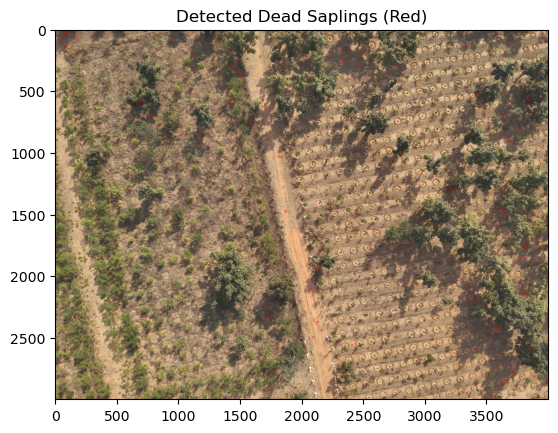

In [13]:
total = len(pit_centers)

if total == 0:
    print("No saplings detected!")
    survival_percent = 0
else:
    survival_percent = (alive/total)*100

print("Total Saplings:", total)
print("Alive:", alive)
print("Dead:", total - alive)
print("Survival %:", survival_percent)

print("Pit centers:",pit_centers)
print("Count:",len(pit_centers))

for (x,y) in dead_points:
    cv2.circle(img_op3, (x,y), 8, (255,0,0), 2)

plt.imshow(img_op3)
plt.title("Detected Dead Saplings (Red)")
plt.show()
